In [250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

C:\Users\woyay\AppData\Local\Temp\ipykernel_4880\673814682.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


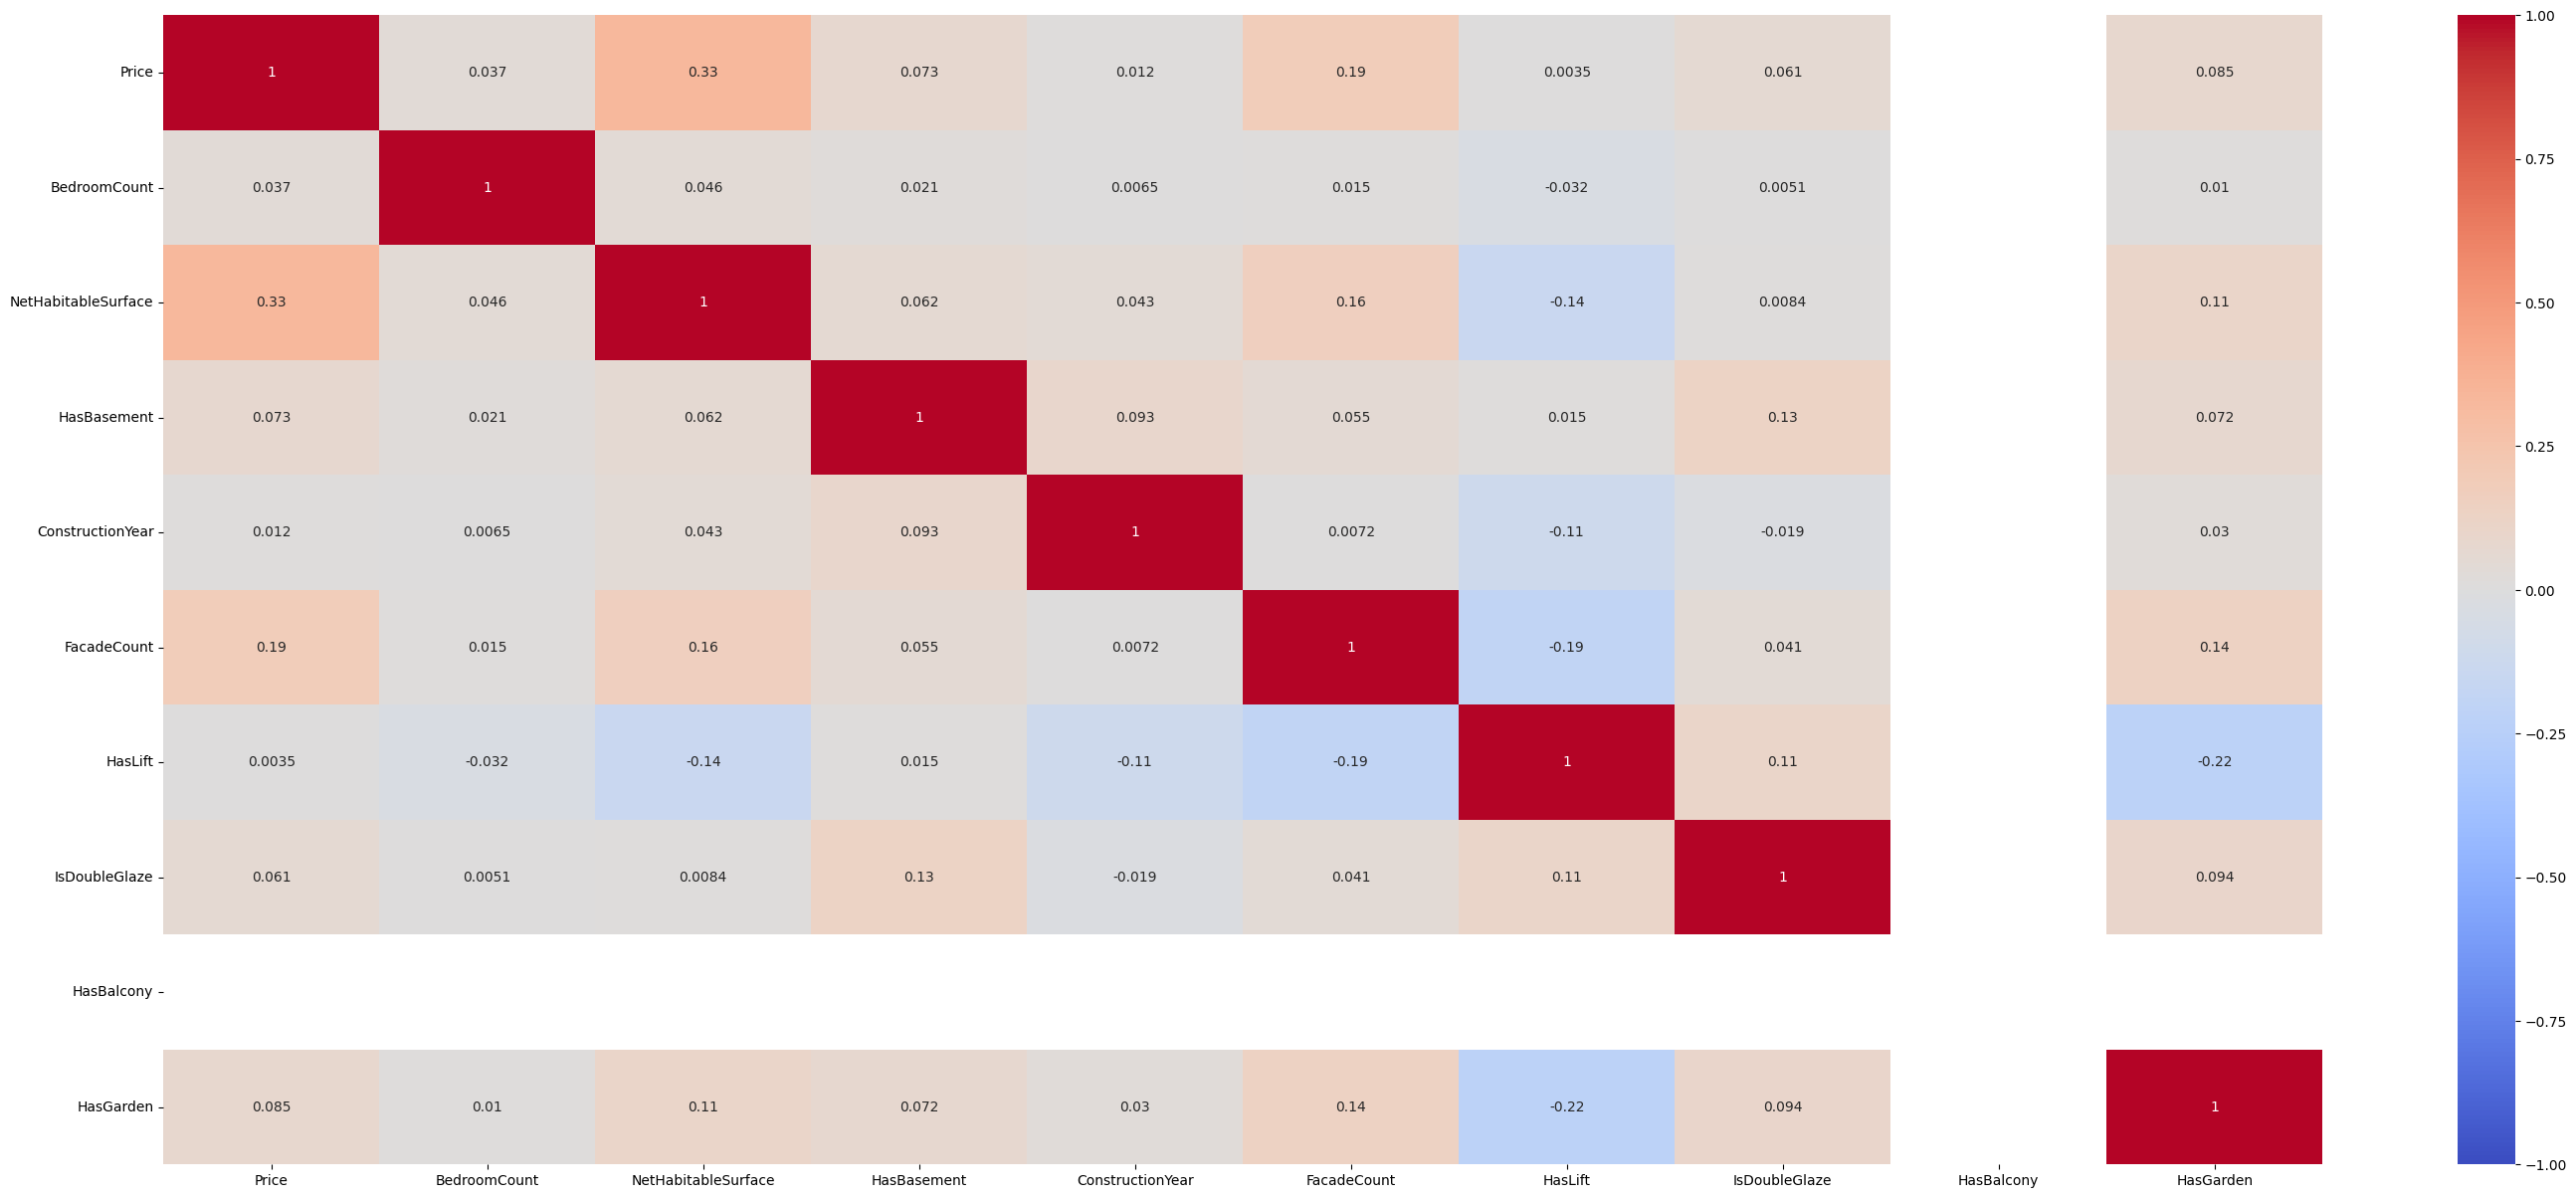

In [311]:
# read file
data_file = 'immo.csv'
df = pd.read_csv(data_file)

# drop column has nan missing values for more than 60%
df = pd.DataFrame(df)
df = df.drop(['ID', 'Sub type', 'Floor', 'IsIsolated', 'HasSeaView', 'TotalRoomCount', 'HasAttic',  'HasDiningRoom',    'GardenArea', 'LivingRoomArea', 'NetHabitableSurface(msq)', 'SchoolDistance', 'ShopDistance', 'TransportDistance', 'BuildingCondition'], axis=1)

# age of building
list_years = []
for year in df['ConstructionYear']:
    years = 2022 - year
    list_years.append(years)
df = df.assign(ConstructionYear = list_years)

# replace & drop nan values
df[['NetHabitableSurface', 'ConstructionYear']] = df[['NetHabitableSurface','ConstructionYear']].fillna(df[['NetHabitableSurface', 'ConstructionYear']].mean())
columns_to_n = ['Type', 'street',  'locality', 'KitchekType']
df[columns_to_n] = df[columns_to_n].replace(np.nan, 'No Value')
df = df.drop_duplicates()
df = df.dropna(subset=['BedroomCount', 'Price', 'Province'])

# replace nan value in heating type with most frequent value
heating_type = df['HeatingType'].mode()[0]
facade_count = df['FacadeCount'].mode()[0]
flood_zone_type = df['FloodZoneType'].mode()[0]

df = df.fillna({'HasLift': False, 'HasBalcony': False,  'HasGarden': False, 'HasBasement': False,  'IsDoubleGlaze': False, 'HeatingType':heating_type, 'FacadeCount': facade_count, 'FloodZoneType':flood_zone_type})

#heatmap
plt.figure(figsize=(35, 15))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);




In [312]:
df['NetHabitableSurface'] = df['NetHabitableSurface'].astype('int')


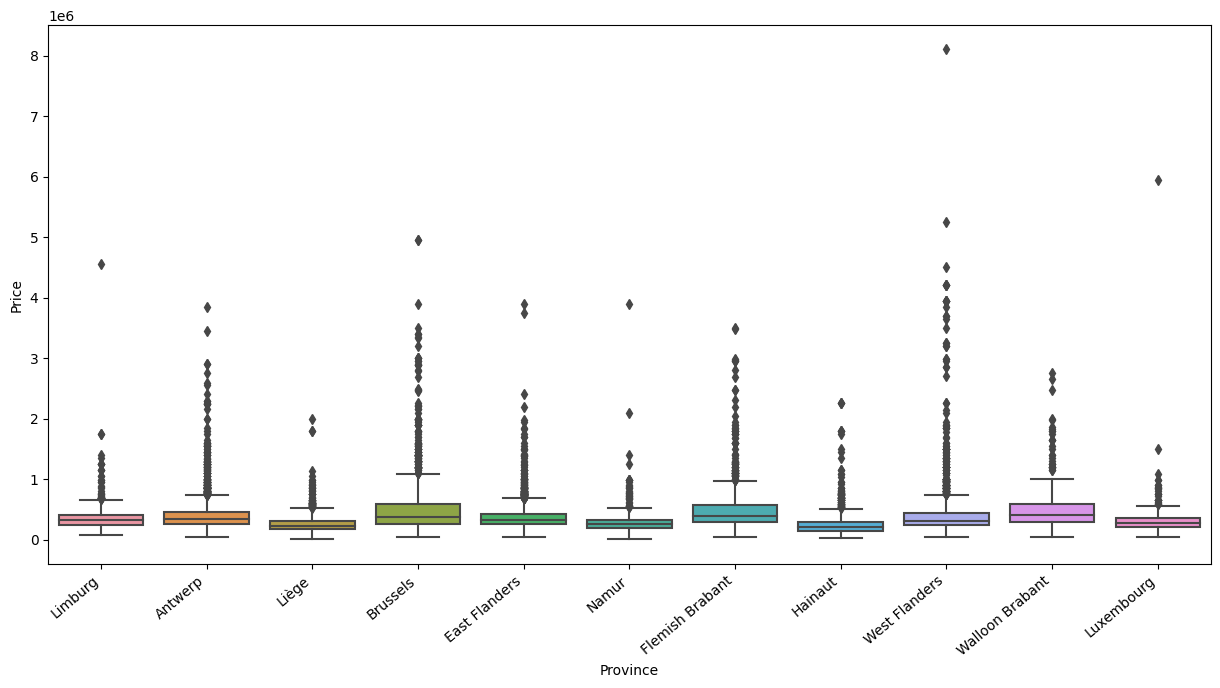

In [313]:
plt.subplots(figsize=(15,7))

ax=sns.boxplot(x='Province',y='Price',data=df)

ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

plt.show()

In [ ]:
# outlier removing
def remove_outlier(data, col):
    q25, q75 = np.percentile(data[col], [25,75])
    iqr = q75 - q25
    min = q25 - (iqr*3)
    max = q75 + (iqr*3)
    df_outlier = data.loc[(data[i] > min) & (data[col] < max)]
    return min, max, q25, q75, iqr, df_outlier

col = ['Price', 'NetHabitableSurface',	'BedroomCount','ConstructionYear']
data = df
for i in col:
    data = remove_outlier(data, col)



In [ ]:
#hist graph
fig, axs = plt.subplots(2,3,figsize=(8,10))

df.hist(column='Price', ax= axs[0][0], bins=120)
df.hist(column='NetHabitableSurface', ax= axs[0][1], bins=330)
df.hist(column='ConstructionYear', ax= axs[1][1], bins=30)

In [314]:
# get dummies
df = pd.get_dummies(data=df, columns=['Type','HasBasement', 'HasLift', 'IsDoubleGlaze', 'HasBalcony', 'HasGarden', 'Type', 'Province', 'locality', 'Region', 'PostCode', 'street', 'RegionCode', 'FloodZoneType', 'HeatingType', 'KitchekType'])
df

,Price,BedroomCount,NetHabitableSurface,ConstructionYear,FacadeCount,Type_APARTMENT,Type_HOUSE,HasBasement_False,HasBasement_True,HasLift_False,...,HeatingType_WOOD,KitchekType_HYPER_EQUIPPED,KitchekType_INSTALLED,KitchekType_NOT_INSTALLED,KitchekType_No Value,KitchekType_SEMI_EQUIPPED,KitchekType_USA_HYPER_EQUIPPED,KitchekType_USA_INSTALLED,KitchekType_USA_SEMI_EQUIPPED,KitchekType_USA_UNINSTALLED
0,328330.0,3.0,148,37.415988,3.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,328330.0,3.0,148,37.415988,3.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,327829.0,3.0,148,37.415988,3.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,378242.0,3.0,148,37.415988,4.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
5,1295000.0,5.0,650,37.415988,3.0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21042,398000.0,3.0,145,60.000000,2.0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
21043,219000.0,2.0,95,37.415988,2.0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
21044,345000.0,3.0,166,56.000000,2.0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
21045,375000.0,3.0,160,51.000000,2.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [315]:


# Train data
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,  test_size=0.2)

scale_col = ['NetHabitableSurface', 'ConstructionYear']
scaler = StandardScaler()
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])
X_test[scale_col] = scaler.fit_transform(X_test[scale_col])


linear regression

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)
y_predict = regression.predict(X_test)
regression.score(X_train, y_train)

In [ ]:
r2_score(y_test,y_predict)

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt_model = RandomForestClassifier(n_estimators=700)
rt_model.fit(X_train, y_train)
y_predict = rt_model.predict(X_test)

In [ ]:
r2_score(y_test,y_predict)

In [ ]:
# graph
plt.scatter(y_test,y_predict)